[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-02-store-input)

## 상가(상권)정보 분석하기
* 데이터 출처 : [공공데이터포털](https://www.data.go.kr/dataset/15012005/fileData.do)
* 소상공인 상권정보 상가업소 데이터
* 영상에 사용한 데이터셋 다운로드 : http://bit.ly/open-data-set-folder

### 데이터셋을 엑셀에서 열어보는 방법

```
MS엑셀(Excel)에서 UTF-8로 된 CSV파일 불러오기 
 ◦  기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 UTF-8 형식으로 추출하였습니다.
 ◦ 개발자가 아닌 일반사용자의 경우 euc-kr(UTF-8 이나 UTF-16)이 아닌 CSV파일을 엑셀에서 바로 열면 한글이 모두 깨지게 됩니다.
 
 ◦ 바로 열지 마시고 다음 절차를 거치시기 바랍니다. 
   - 엑셀을 실행하고 데이터 → 텍스트를 선택합니다.
   - 가져올 파일을 선택하고 확인을 클릭합니다.
   - 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다. 
     * UTF-8의 코드 페이지 넘버는 65001입니다.
 
   - 원본 데이터 파일 유형을 ‘구분 기호로 분리됨’ 선택합니다. 
   - 기타 ‘|’(파이프) 입력, 3단계 텍스트로 선택합니다.  
     * 단, 지번코드, 건물관리번호, 신우편번호, 경도, 위도 등 행마다 텍스트 선택   
  
``` 

### 데이터셋 분류 지역
* 이 튜토리얼에서는 1번 파일만 사용합니다.

```
※ 파일데이터 분류 지역 
1 : 서울, 부산
2 : 대구, 인천, 광주, 대전, 울산
3 : 경기, 강원, 충북
4 : 충남, 전북, 전남, 경북, 경남, 제주
```

## 라이브러리 로드

In [1]:
# 라이브러리를 로드합니다.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## 한글폰트 설정

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [3]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 한글폰트 설정 확인

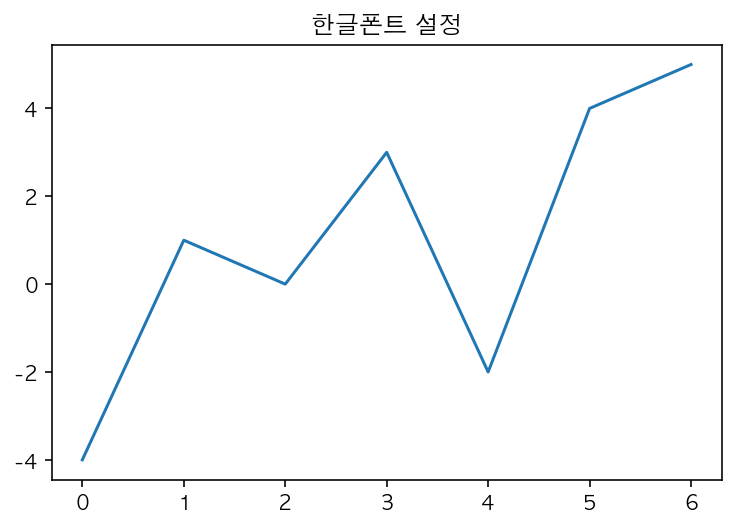

In [4]:
pd.Series([-4, 1, 0, 3, -2, 4, 5]).plot(title='한글폰트 설정')

## 파일로드

In [5]:
# 파일을 로드합니다.

df = pd.read_csv('data/상가업소정보_201912_01.csv', sep='|')
df.shape

(573680, 39)

In [6]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.

pd.options.display.max_columns = 39

## 미리보기

### head, tail

In [7]:
# head 로 미리보기를 합니다.

df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [8]:
# tail 로 미리보기를 합니다.

df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144056500,공덕동,1144010200,공덕동,1144010200201050067,1,대지,105,67.0,서울특별시 마포구 공덕동 105-67,114404139142,서울특별시 마포구 마포대로14길,4,NaN,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11200,성동구,1120069000,성수2가3동,1120011500,성수동2가,1120011500202890015,1,대지,289,15.0,서울특별시 성동구 성수동2가 289-15,112004109367,서울특별시 성동구 성수일로8길,37,NaN,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11680,강남구,1168052100,논현1동,1168010800,논현동,1168010800201650008,1,대지,165,8.0,서울특별시 강남구 논현동 165-8,116802102001,서울특별시 강남구 강남대로,492,NaN,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11560,영등포구,1156054000,여의동,1156011000,여의도동,1156011000200230000,1,대지,23,NaN,서울특별시 영등포구 여의도동 23,115603118002,서울특별시 영등포구 국제금융로,10,NaN,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11320,도봉구,1132051100,창1동,1132010700,창동,1132010700208120000,1,대지,812,NaN,서울특별시 도봉구 창동 812,113204127109,서울특별시 도봉구 도봉로114길,22,8.0,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


### 인덱스 정보 보기

In [9]:
df.index

RangeIndex(start=0, stop=573680, step=1)

### 컬럼명만 보기

In [10]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### info

In [11]:
# info 로 데이터프레임의 정보보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
상가업소번호       573680 non-null int64
상호명          573679 non-null object
지점명          76674 non-null object
상권업종대분류코드    573680 non-null object
상권업종대분류명     573680 non-null object
상권업종중분류코드    573680 non-null object
상권업종중분류명     573680 non-null object
상권업종소분류코드    573680 non-null object
상권업종소분류명     573680 non-null object
표준산업분류코드     539290 non-null object
표준산업분류명      539290 non-null object
시도코드         573680 non-null int64
시도명          573680 non-null object
시군구코드        573680 non-null int64
시군구명         573680 non-null object
행정동코드        573680 non-null int64
행정동명         573680 non-null object
법정동코드        573680 non-null int64
법정동명         573680 non-null object
지번코드         573680 non-null int64
대지구분코드       573680 non-null int64
대지구분명        573680 non-null object
지번본번지        573680 non-null int64
지번부번지        474924 non-null float64
지번주소         573680 non-null obje

### 데이터 타입 보기

In [12]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치 확인하기

In [13]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

In [14]:
# 결측치를 구해서 n 이라는 변수에 담고 재사용 합니다.

n = df.isnull().sum()

### 결측치 시각화

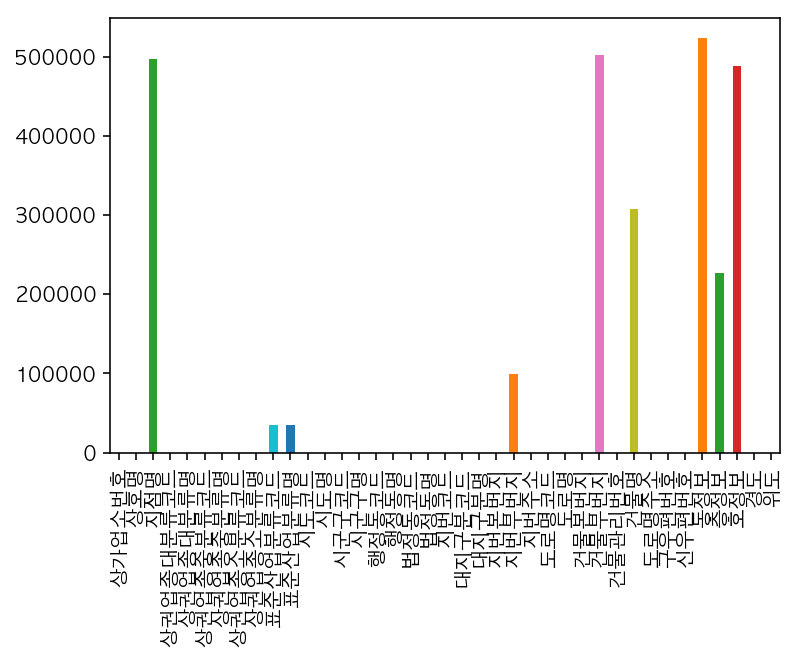

In [15]:
# 막대그래프로 시각화 합니다.

n.plot.bar()

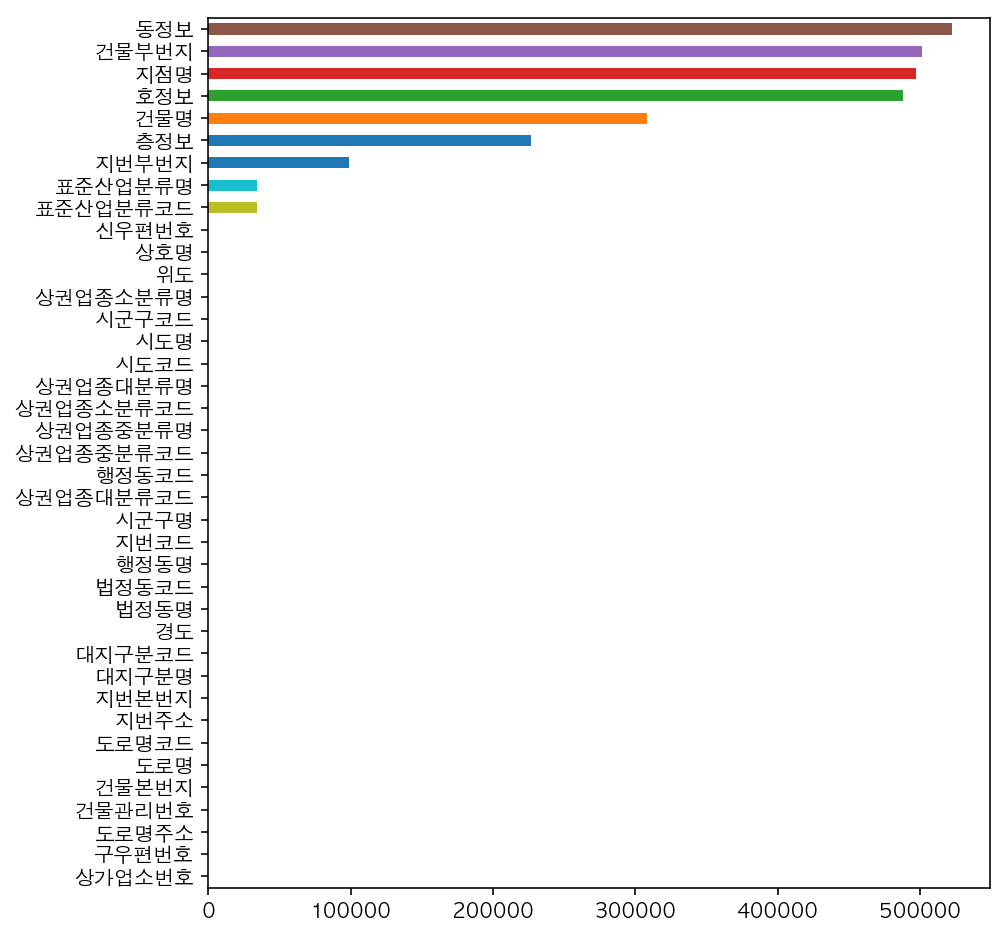

In [16]:
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도록 barh로 그립니다.

n.sort_values().plot.barh(figsize=(7, 8))